<h1 style="text-align:center">
    Estadísticas de Accidentes en Madrid
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Esther Fernández Barchín
</h3>
    
<h3 style="text-align:center">
    17 de mayo de 2022
</h3>

<hr>

## Introducción

<font color="darkblue"> En este proyecto se desarrolla en Python un análisis básico de datos sobre accidentes de tráfico de la Comunidad de Madrid. Los datos provienen de ***.
A partir de ellos he realizado ... He conseguido ... pero no he podido ...
</font>

<font color="green">Completa tú el breve apartado anterior. Elimina este párrafo en verde. A partir de ahora, pon en azul los comentarios tuyos, dejando en negro los míos, del enunciado.
</font>

## Librerías

<font color="darkblue">
Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.    
</font>

## a) Algunas operaciones sencillas [2 puntos]

Vamos a trabajar con una tabla del INE que contiene información sobre el paro en España. Abriendo el archivo, vemos algo así:

<center>
    <img src="./images/tabla_1.png" width="800">
</center>

Si miramos una línea de esta tabla (salvo la primera, que es la cabecera), encontamos lo siguiente:
    
<table>
  <tr>
    <th>2020S000073</th>
    <th>01/01/2020</th>
    <th>18:48</th>
    <th>AVDA. PIO XII</th>
    <th>81</th>
    <th>CHAMARTÍN</th>
    <th>Atropello a persona</th>
    <th>Despejado</th>
    <th>Turismo</th>
    <th>Conductor</th>
    <th>DE 55 A 59 AÑOS</th>
    <th>Hombre</th>
    <th>14</th>
    <th> </th>
  </tr>
</table>

Pero si inspeccionamos el archivo con un editor de texto, vemos que esa línea es como sigue:

    2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;

Una cadena de caracteres. Hagamos en Python algunas operaciones básicas con los algunos de los datos anteriores y con la cadena en sí.

**a.1 Redondeo de la hora**

La primera operación consiste en redondear una hora, simplemente despreciando los minutos y dando lugar al entero correspondiente, entre 0 y 23. 

In [200]:
import datetime as dt

In [201]:
# Esta celda debe ser completada por el estudiante
def redondeo_hora(d: str) -> int:
    t: dt.datetime = dt.datetime.strptime(d,"%H:%M")
    return t.hour if t.minute < 30 else t.hour + 1

In [202]:
# Pruebas de funcionamiento:
redondeo_hora('12:48')


13

Es bastante habitual hacer varias pruebas a la vez:

In [203]:
# Pruebas de funcionamiento:

for h in ['15:00', '23:15', '14:22', '9:34']:
    print(redondeo_hora(h))

15
23
14
10


**a.2 Rangos de edad**

Ahora, deseamos codificar los rangos de edad, asignando a cada rango descrito un intervalo de dos enteros. El ejemplo de funcionamiento te aclarará lo que se pide exactamente: 

In [204]:
from typing import Tuple


In [205]:
# Esta celda debe ser completada por el estudiante
def rango_edad(c: str) -> Tuple[int,int]:
    c = c.upper()
    if "DE " in c and " A " in c and " AÑOS" in c:
        L = c.split(" ")
        return (int(L[1]), int(L[3]))
    elif "MAYOR DE " in c and " AÑOS" in c:
        return (int(c.split(" ")[2]) + 1, 100)
    elif "DESCONOCIDA" in c:
        return (-1, -1)
    else:
        raise Exception("ERROR")




In [206]:
rango_edad("DE 25 A 29 AÑOS")

(25, 29)

In [207]:
rango_edad("DESCONOCIDA")

(-1, -1)

In [208]:
rango_edad("MAYOR DE 74 AÑOS")

(75, 100)

In [209]:
# Pruebas de funcionamiento:

for c in  ['DE 25 A 29 AÑOS', 'DESCONOCIDA', 'MAYOR DE 74 AÑOS']:
    print(c, " -> ", rango_edad(c))

DE 25 A 29 AÑOS  ->  (25, 29)
DESCONOCIDA  ->  (-1, -1)
MAYOR DE 74 AÑOS  ->  (75, 100)


**a.3 Lesividad: datos en blanco**

El dato de lesividad viene codificado con un entero:

    01 Atención en urgencias sin posterior ingreso. - LEVE
    02 Ingreso inferior o igual a 24 horas - LEVE
    ...
    77 Se desconoce
    En blanco Sin asistencia sanitaria
    
Deseamos convertir este dato en un número entero. Cuando no se requiere asistencia sanitaria vamos a codificar esto con el entero 0 por homogeneidad. Cuando la lesividad no se conoce (un dato missing por ejemplo), también la consignaremos con un cero.

In [210]:
# Esta celda debe ser completada por el estudiante
def lesividad(c: str) -> int:
    return 0 if len(c) == 0 else int(c)


In [211]:
lesividad('02')

2

In [212]:
# Pruebas de funcionamiento:

for c in  ['01', '02', '14', '', '77']:
    print(c, " -> ", lesividad(c))

01  ->  1
02  ->  2
14  ->  14
  ->  0
77  ->  77


**a.4 Operaciones con una línea de datos**

Si ahora abres el archivo de datos con un editor de texto, podrás ver algo parecido a lo siguiente:

<center>
    <img src="./images/tabla_2.png" width="800">
</center>

La línea novena es la que poníamos antes como ejemplo. Vista como una cadena de caracteres, podemos almacenarla en una variable para procesarla:


    linea_9 = "2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;"

Y luego, podríamos hacer con ella algunas operaciones básicas, separando sus piezas (con el método `split`), extrayendo alguna que nos interese (accediendo a la componente adecuada con el corchete `[...]`, y estas piezas se pueden manejar con las funciones definicas antes, `redondeo_hora` y `rango_edad`.

En una primera versión, esto puede hacerse con una función que va imprimiendo las cosas, así:

    def presentar_operaciones_basicas(cadena):
        print("La cadena de entrada: ")
        print(cadena)
        print()
        print("Piezas: ")
        ...

In [213]:
# Esta celda debe ser completada por el estudiante
def presentar_operaciones_basicas(cadena):
    print("La cadena de entrada: ")
    print(cadena)
    print()
    print("Piezas: ")
    print(cadena.split(';'))
    print()
    print("Distrito: ")
    distrito = cadena.split(';')
    print(distrito[5])
    print()
    print("La hora, sin y con redondeo: ")
    hora = cadena.split(';')
    print(hora[2])
    print(redondeo_hora(hora[2]))
    print()
    print("La edad tal y como viene y su rango: ")
    edad = cadena.split(';')
    print(edad[10])
    print(rango_edad(edad[10]))


In [214]:
# Ejemplo de funcionamiento:

linea_9 = "2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;"
presentar_operaciones_basicas(linea_9)

La cadena de entrada: 
2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;

Piezas: 
['2020S000073', '01/01/2020', '18:48', 'AVDA. PIO XII', '81', 'CHAMARTÍN', 'Atropello a persona', 'Despejado', 'Turismo', 'Conductor', 'DE 55 A 59 AÑOS', 'Hombre', '14', '', '']

Distrito: 
CHAMARTÍN

La hora, sin y con redondeo: 
18:48
19

La edad tal y como viene y su rango: 
DE 55 A 59 AÑOS
(55, 59)


Decíamos que, en una primera versión, esto puede hacerse con una función que va imprimiendo las cosas. 
Pero realmente, no es el estilo deseable. Preferimos una función que no escriba nada, que devuelva su resultado con `return`. Y de paso, que devuelva únicamente las piezas que nos interesan, por ejemplo: la hora (redondeada), el distrito, el estado meteorológico, el rango de edad y el nivel (entero) de lesividad del accidente.

(Lógicamente, según el objetivo que nos interese, podría ser necesario luego cargar unos campos u otros.)

In [215]:
# Esta celda debe ser completada por el estudiante
def extraer_datos(cadena: str):
    return [
        redondeo_hora(cadena.split(';')[2]),
        (cadena.split(';')[5]),
        (cadena.split(';')[7]),
        rango_edad(cadena.split(';')[10]),
        lesividad(cadena.split(';')[12])
    ]
    

In [216]:
# Pruebas de funcionamiento:

print(len(linea_9.split(";")))
print(extraer_datos(linea_9))

15
[19, 'CHAMARTÍN', 'Despejado', (55, 59), 14]


## b) Lectura de datos del archivo [2 puntos]

En este apartado te planteo diseñar tres funciones de lectura de datos.

**b.1. Cabecera** La primera función leerá la cabecera del archivo de datos, esto es, su primera línea, y la descompondrá en los rótulos correspondientes a cada columna. Además de abrir el archivo (preferiblemente con la instrucción `with open...`), bastará con un único `readline`.

In [217]:
import csv


In [218]:
# Esta celda debe ser completada por el estudiante
with open("2020_Accidentalidad.csv", mode = "r", encoding = "iso-8859-1") as f:
    cabecera = f.readline().split(";")
cabecera


['Nº  EXPEDIENTE',
 'FECHA',
 'HORA',
 'CALLE',
 'NÚMERO',
 'DISTRITO',
 'TIPO ACCIDENTE',
 'ESTADO METEREOLÓGICO',
 'TIPO VEHÍCULO',
 'TIPO PERSONA',
 'RANGO DE EDAD',
 'SEXO',
 'LESIVIDAD*',
 '',
 '\n']

In [219]:
#Pruebas de funcionamiento:
#No he definido ninguna función por lo que no he utilizado la prueba de funcionamiento
#cabecera = cargar_cabecera("2020_Accidentalidad.csv")
#print(cabecera)

**b.2 Lectura de algunas líneas del archivo**

Ahora, nos interesa leer justamente los datos a partir de la cabecera, esto es algunas de las demás líneas. Una forma de saltarnos esa primera línea es usar la instrucción `next`. Pongamos que queremos leer desde la línea $17$ hasta la $23$. Podemos leer (sin procesar) $17-1$ líneas y luego, podemos leer y retener $23-17+1$ líneas.

In [220]:
# Esta celda debe ser completada por el estudiante
def cargar_lineas(file: str, line1: int = 0, line2: int = 10):
    acc = []
    with open(file, mode = "r", encoding = "iso-8859-1") as f:
        next(f)
        for i,line in enumerate(f):
            if i >= line1 and i < line2:
                acc.append(extraer_datos(line.strip()))
    return acc

#Asumiendo que la linea 0 de datos existe    

In [221]:
lineas_lista = cargar_lineas("2020_Accidentalidad.csv", 17, 23)

for line in lineas_lista:
    print(line)
    
# Si no decimos qué líneas nos interesa, se cargarán las diez primeras.
# (Esto puede hacerse con dos parámetros por defecto.)



[17, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 2]
[16, 'HORTALEZA', 'Despejado', (21, 24), 14]
[16, 'HORTALEZA', 'Despejado', (18, 20), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]


In [222]:
lineas_lista = cargar_lineas("2020_Accidentalidad.csv")

for linea in lineas_lista:
    print(linea)

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[23, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
[20, 'CENTRO', 'Despejado', (-1, -1), 0]
[20, 'CARABANCHEL', 'Despejado', (-1, -1), 14]
[20, 'CARABANCHEL', 'Despejado', (21, 24), 2]
[19, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
[19, 'CHAMARTÍN', 'Despejado', (18, 20), 7]
[19, 'ARGANZUELA', '', (55, 59), 14]


**b.3 Lectura de todas las líneas del archivo**

Lo normal es desear cargar **todos** los datos de un archivo, y no sólo unas pocas líneas, excluyendo la cabecera. Al igual que en la función anterior, te pido que el resultado se dé en una lista, donde cada elemento recoge la información de una línea del archivo de datos, salvo la cabecera, pero incluyendo ahora **todas** esas líneas, sin dar opción a cuáles nos interesa, aunque luego deseemos mostrar tan solo unas pocas. Véanse ambas pruebas de funcionamiento. 

In [223]:
# Esta celda debe ser completada por el estudiante
def cargar_datos(file):
    acc = []
    with open(file, mode = "r", encoding = "iso-8859-1") as f:
        lines = f.readlines()[1:]
        return [extraer_datos(line.strip()) for line in lines]

In [224]:
# Pruebas de funcionamiento:


datos_lista = cargar_datos("2020_Accidentalidad.csv")

for linea in datos_lista:
    print(linea)    

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[23, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
[20, 'CENTRO', 'Despejado', (-1, -1), 0]
[20, 'CARABANCHEL', 'Despejado', (-1, -1), 14]
[20, 'CARABANCHEL', 'Despejado', (21, 24), 2]
[19, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
[19, 'CHAMARTÍN', 'Despejado', (18, 20), 7]
[19, 'ARGANZUELA', '', (55, 59), 14]
[19, 'ARGANZUELA', '', (35, 39), 14]
[17, 'HORTALEZA', 'Despejado', (40, 44), 0]
[17, 'HORTALEZA', 'Despejado', (30, 34), 0]
[17, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[17, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 14]
[17, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 2]
[17, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 2]
[17, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 2]
[16, 'HORTALEZA', 'Despejado', (21, 24), 14]
[16, 'HORTALEZA', 'Despejado', (18, 20), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'HORTALEZA', 'Despej

In [225]:
# Pruebas de funcionamiento:

for linea in datos_lista[0:4]:
    print(linea)    

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[23, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]


## c) Accidentalidad y mortalidad por edad [2 puntos]

**c.1. Accidentalidad. Cómputo básico**

Deseamos totalizar el número de accidentes de nuestra tabla por cada rango de edad. Para ello, te pido que uses un diccionario en el que la clave es el rango de edad y el valor, el total de accidentes para dicho rango de edad. Ahora, las posibilidades son dos:

1. Cada accidente actualiza el diccionario así: si ese rango de edad no está en el diccionario, se añade con un total de un accidente; si ya está, se añade una unidad más al tltal de accidentes de dicho rango de edad

2. Con un diccionario con el valor 0 por defecto.

In [226]:
import pandas as pd


In [227]:
df = pd.read_csv("2020_Accidentalidad.csv",header = 0,sep = ";",encoding = "iso-8859-1",na_values=' ')
edad = list(df.iloc[:,10])
mapa_edad = list(map(rango_edad, edad))


In [228]:
# Esta celda debe ser completada por el estudiante
def totales(lista):
    diccionario = {}
    for elemento in lista:
        clave = elemento
        valor = lista.count(clave)
        diccionario[clave] = valor

    return diccionario

In [229]:
#Pruebas de funcionamiento
#(https://devcode.la/tutoriales/listas-python/#:~:text=Para%20saber%20cu%C3%A1ntas%20veces%20un,utilizar%20el%20metodo%20count().&text=Contamos%20cuantas%20veces%20se%20repite,lista%2C%20y%20esto%20devuelve%202.
# )
total_accidentes_por_edades = totales(mapa_edad)

for k, e in total_accidentes_por_edades.items():
    print(k, e)

(25, 29) 3437
(21, 24) 2226
(45, 49) 3084
(-1, -1) 3962
(55, 59) 2077
(18, 20) 978
(35, 39) 3332
(40, 44) 3399
(30, 34) 3362
(50, 54) 2547
(60, 64) 1272
(65, 69) 641
(15, 17) 250
(70, 74) 427
(75, 100) 657
(0, 5) 289
(6, 9) 175
(10, 14) 305


**c.2. Accidentalidad con mortalidad**

Deseamos recopilar, para cada rango de edad, el total de accidentes registrados en nuestra tabla, junto con el número de dichos accidentes que han resultado ser mortales. El cociente (multiplicado por mil) nos dará la tasa de accidentes mortales por cada mil accidentes.

In [230]:
# Esta celda debe ser completada por el estudiante

def totales_mortales(datos_lista):
    diccionario = {}
    for row in datos_lista:
        age_range = row[3]
        lesividad = row[4]
        if age_range in diccionario:
            diccionario[age_range] = (
                diccionario[age_range][0] + 1,
                diccionario[age_range][1] + int(lesividad == 4)
            )
        else:
            diccionario[age_range] = (
                1, int(lesividad == 4)
            )
    return [(k,v) for k,v in diccionario.items()]

Observa que la función `totales_mortales` devuelve una lista, y no un diccionario.

In [231]:
# Prueba de funcionamiento:

total_accidentes_y_muertes_por_edades = totales_mortales(datos_lista)

for edades, dos_totales in total_accidentes_y_muertes_por_edades:
    print(edades, dos_totales)
    
print()

# Total accidentes mortales / 1000 accidentes, por rangos de edad:

tasa_accidentes_mortales_por_mil = [(k, m*1000/n) for k, (n, m) in total_accidentes_y_muertes_por_edades]
                                    
for k_tasa  in tasa_accidentes_mortales_por_mil:
    print(k_tasa)                           

(25, 29) (3437, 3)
(21, 24) (2226, 2)
(45, 49) (3084, 4)
(-1, -1) (3962, 0)
(55, 59) (2077, 1)
(18, 20) (978, 0)
(35, 39) (3332, 8)
(40, 44) (3399, 6)
(30, 34) (3362, 2)
(50, 54) (2547, 1)
(60, 64) (1272, 1)
(65, 69) (641, 1)
(15, 17) (250, 0)
(70, 74) (427, 1)
(75, 100) (657, 4)
(0, 5) (289, 1)
(6, 9) (175, 0)
(10, 14) (305, 0)

((25, 29), 0.8728542333430317)
((21, 24), 0.8984725965858041)
((45, 49), 1.297016861219196)
((-1, -1), 0.0)
((55, 59), 0.4814636494944632)
((18, 20), 0.0)
((35, 39), 2.4009603841536613)
((40, 44), 1.7652250661959399)
((30, 34), 0.594883997620464)
((50, 54), 0.39261876717707106)
((60, 64), 0.7861635220125787)
((65, 69), 1.5600624024960998)
((15, 17), 0.0)
((70, 74), 2.34192037470726)
((75, 100), 6.0882800608828)
((0, 5), 3.4602076124567476)
((6, 9), 0.0)
((10, 14), 0.0)


## d) Algunas gráficas [1.5 puntos]


**d.1 Un modelo de gráfica.** Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [232]:
import matplotlib.pyplot as plt

In [233]:
#Bibliografia
#https://www.codegrepper.com/code-examples/whatever/python+split+list+of+tuples+in+two+lists
#https://www.iteramos.com/pregunta/81943/convertir-una-lista-de-pares-en-dos-listas
#https://www.delftstack.com/

In [238]:
# Esta celda debe ser completada por el estudiante
def representar_xxx_yyy(lista_original,lista_de_str :str = 0):
    x,y = zip(*lista_original)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.grid(axis='both')
    plt.xticks(rotation = 45)
    ax.set_title(lista_de_str[0])
    ax.set_xlabel(lista_de_str[2])
    ax.set_ylabel(lista_de_str[1])   

TypeError: 'int' object is not subscriptable

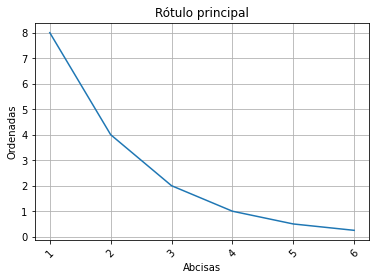

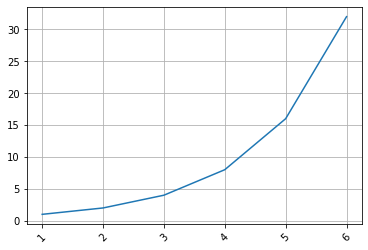

In [240]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Rótulo principal", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

**d.2. Tasas de muerte por edades** 

Queremos aplicar nuestro modelo de gráfica a la representación de las tasas de accidentes mortales por edad, que hemos calculado un poco antes. Pero obtenemos una gráfica poco adecuada, porque las edades (las abcisas) están en un orden arbitrario.

In [ ]:
# Intento de representación:

rotulos = "Tasas de muerte en accidentes por rangos de edad", "Tasas de muerte", "Rangos de edad"
representar_xxx_yyy(tasa_accidentes_mortales_por_mil, rotulos)

NameError: name 'tasa_accidentes_mortales_por_mil' is not defined

Para remediar esto se ha de reordenar la lista de pares absisa-ordenada, atendiendo a las abcisas. También, el elemento de abcisa (-1, -1) se ha de suprimir. Esto es lo que te pido.

In [ ]:
# Esta celda debe ser completada por el estudiante


[((0, 5), 3.4602076124567476),
 ((6, 9), 0.0),
 ((10, 14), 0.0),
 ((15, 17), 0.0),
 ((18, 20), 0.0),
 ((21, 24), 0.8984725965858041),
 ((25, 29), 0.8728542333430317),
 ((30, 34), 0.594883997620464),
 ((35, 39), 2.4009603841536613),
 ((40, 44), 1.7652250661959399),
 ((45, 49), 1.297016861219196),
 ((50, 54), 0.39261876717707106),
 ((55, 59), 0.4814636494944632),
 ((60, 64), 0.7861635220125787),
 ((65, 69), 1.5600624024960998),
 ((70, 74), 2.34192037470726),
 ((75, 100), 6.0882800608828)]

: 

: 

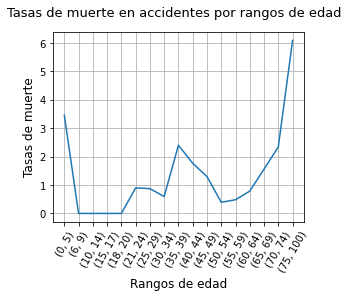

: 

: 

In [ ]:
# Prueba de funcionamiento:

representar_xxx_yyy(tasa_accidentes_mortales_por_mil, rotulos)

**d.3. Tasas de muerte por rangos horarios** 

De forma similar a lo resuelto en los apartados anteriores, deseamos preparar los datos y un gráfico con la tasa de muerte por rangos horarios. En lugar de tratar los rangos por horas enteras (las 4 representa el intervalo entre las 4:00 y las 4:59), deseamos representar de dos en dos horas (las 4 representa el intervalo entre las 4:00 y las 5:59, las 6, entre las 6:00 y las 7:59, etc.) 

Observa que se necesitan dos funciones, una para recopilar los datos, calcular las tasas, dar  una lista ordenada, etc., y otra para preparar las abcisas, cadenas de caracteres con las horas de dos en dos, junto con sus tasas respectivas.

In [ ]:
# Esta celda debe ser completada por el estudiante


: 

: 

[(0, 1.9230769230769231), (2, 4.178272980501393), (4, 1.949317738791423), (6, 0.8635578583765112), (8, 1.1415525114155252), (10, 1.5337423312883436), (12, 0.8234971177600878), (14, 1.112099644128114), (16, 0.5351886540005352), (18, 0.4287245444801715), (20, 1.1999040076793857), (22, 1.187178472497032)]

[('(0, 2)', 1.9230769230769231), ('(2, 4)', 4.178272980501393), ('(4, 6)', 1.949317738791423), ('(6, 8)', 0.8635578583765112), ('(8, 10)', 1.1415525114155252), ('(10, 12)', 1.5337423312883436), ('(12, 14)', 0.8234971177600878), ('(14, 16)', 1.112099644128114), ('(16, 18)', 0.5351886540005352), ('(18, 20)', 0.4287245444801715), ('(20, 22)', 1.1999040076793857), ('(22, 24)', 1.187178472497032)]


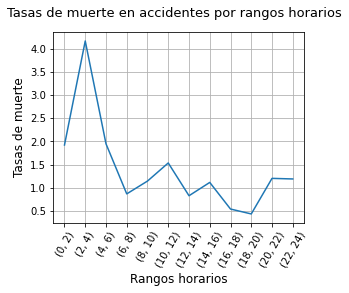

: 

: 

In [ ]:
# Prueba de funcionamiento:

tasas_accidentes_y_muertes_por_horario = totales_mortales_por_horario(datos_lista)

print(tasas_accidentes_y_muertes_por_horario)

print()

datos_para_grafica = emparejar_abcisas(tasas_accidentes_y_muertes_por_horario)

print(datos_para_grafica)

rotulos = "Tasas de muerte en accidentes por rangos horarios", "Tasas de muerte", "Rangos horarios"
representar_xxx_yyy(datos_para_grafica, rotulos)

## e) Operaciones con dataframes [1.5 puntos]

En este apartado, vamos a trabajar con tablas de la librería `pandas`, llamadas `dataframes`.

**e1. Carga del dataframe.**
La primera operación que necesitamos es cargar el archivo de datos en una tabla, como se ve en el siguiente ejemplo.

In [ ]:
# Esta celda debe ser completada por el estudiante
df = pd.read_csv("2020_Accidentalidad.csv",header = 0,sep = ";",encoding = "iso-8859-1",na_values=' ')

: 

: 

In [ ]:
tabla_pre = cargar_dataframe_v0("2020_Accidentalidad.csv")
print(tabla_pre)

        HORA             DISTRITO    RANGO DE EDAD  LESIVIDAD*
0      23:15               RETIRO  DE 25 A 29 AÑOS         NaN
1      22:35      MONCLOA-ARAVACA  DE 21 A 24 AÑOS         6.0
2      20:15  FUENCARRAL-EL PARDO  DE 45 A 49 AÑOS        14.0
3      20:15  FUENCARRAL-EL PARDO  DE 25 A 29 AÑOS         7.0
4      19:45               CENTRO      DESCONOCIDA         NaN
...      ...                  ...              ...         ...
32415   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32416   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32417   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32418   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32419   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN

[32420 rows x 4 columns]


: 

: 

**e2. Carga del dataframe, codificando rangos de edad y lesividad.**
Ahora, queremos modificar esta lectura para que los rangos de edad se conviertan en el intervalo correspondiente. Además, vemos que el nivel de lesividad se ha leído directamente como un real, y las cadenas en blanco se han traducido a `NaN` (*Not a Number*). Queremos ponerlo como un entero, consistente en un 1 cuando hay lesividad. Cuando no se conoce la lesividad, o no hay lesividad (casos codificados con un 0, un 77, un 14), anotamos un 0 en la tabla.

In [ ]:
# Esta celda debe ser completada por el estudiante


: 

: 

In [ ]:
tabla = cargar_dataframe("2020_Accidentalidad.csv")
tabla

,HORA,DISTRITO,RANGO DE EDAD,LESIVIDAD*
0,23,RETIRO,"(25, 29)",0
1,22,MONCLOA-ARAVACA,"(21, 24)",1
2,20,FUENCARRAL-EL PARDO,"(45, 49)",0
3,20,FUENCARRAL-EL PARDO,"(25, 29)",1
4,19,CENTRO,"(-1, -1)",0
...,...,...,...,...
32415,0,CHAMARTÍN,"(35, 39)",0
32416,0,CHAMARTÍN,"(35, 39)",0
32417,0,CHAMARTÍN,"(35, 39)",0
32418,0,CHAMARTÍN,"(35, 39)",0


: 

: 

**e3. Tabla de número de accidentes por rangos de edad**

Nos interesa quedarnos únicamente con dos columnas: el rango de edad y el número de accidentes, formando una tabla nueva. Esta tabla debe mostrarse en orden ascendente de rango de edad.

In [ ]:
# Esta celda debe ser completada por el estudiante


,Edad,NumAccs
0,"(-1, -1)",3962
1,"(0, 5)",289
2,"(6, 9)",175
3,"(10, 14)",305
4,"(15, 17)",250
5,"(18, 20)",978
6,"(21, 24)",2226
7,"(25, 29)",3437
8,"(30, 34)",3362
9,"(35, 39)",3332


: 

: 

Esta tabla contiene el rango de edad $(-1, -1)$, que no nos interesa. Por eso preferimos descartar esta fila.

In [ ]:
# Esta celda debe ser completada por el estudiante


,Edad,NumAccs
1,"(0, 5)",289
2,"(6, 9)",175
3,"(10, 14)",305
4,"(15, 17)",250
5,"(18, 20)",978
6,"(21, 24)",2226
7,"(25, 29)",3437
8,"(30, 34)",3362
9,"(35, 39)",3332
10,"(40, 44)",3399


: 

: 

**e4. Accidentes con consecuencias médicas.**

Queremos totalizar ahora los accidentes que requieren algún tipo de atención sanitaria o con resultado de muerte por cada rango de edad.

In [ ]:
# Esta celda debe ser completada por el estudiante


,Edad,NumAccsConLesiones
1,"(0, 5)",107
2,"(6, 9)",73
3,"(10, 14)",135
4,"(15, 17)",114
5,"(18, 20)",325
6,"(21, 24)",720
7,"(25, 29)",1184
8,"(30, 34)",1098
9,"(35, 39)",944
10,"(40, 44)",899


: 

: 

**e5. Unión de dos tablas.**

Deseamos ahora combinar las dos tablas generadas, usando la columna "Edad" como pivote, al estilo de la operación `inner join` de SQL en el mundo de las bases de datos. 

In [ ]:
# Esta celda debe ser completada por el estudiante


,Edad,NumAccs,NumAccsConLesiones
0,"(0, 5)",289,107
1,"(6, 9)",175,73
2,"(10, 14)",305,135
3,"(15, 17)",250,114
4,"(18, 20)",978,325
5,"(21, 24)",2226,720
6,"(25, 29)",3437,1184
7,"(30, 34)",3362,1098
8,"(35, 39)",3332,944
9,"(40, 44)",3399,899


: 

: 

**e6. Proporción de accidentes con lesiones.**

Deseamos ahora ver las cifras de lesiones en términos relativos, esto es, como el porcentaje  proporcióde accidentes en que se producen lesiones. 

In [ ]:
# Esta celda debe ser completada por el estudiante


,Edad,NumAccs,NumAccsConLesiones,PropLesiones
0,"(0, 5)",289,107,37.024221
1,"(6, 9)",175,73,41.714286
2,"(10, 14)",305,135,44.262295
3,"(15, 17)",250,114,45.600000
4,"(18, 20)",978,325,33.231084
5,"(21, 24)",2226,720,32.345013
6,"(25, 29)",3437,1184,34.448647
7,"(30, 34)",3362,1098,32.659131
8,"(35, 39)",3332,944,28.331333
9,"(40, 44)",3399,899,26.448956


: 

: 

**e6. Gráfico.**

Finalmente, deseamos presentar la proporción de accidentes con lesiones por edades, por si al ver esto pudiéramos extraer alguna conclusión útil.

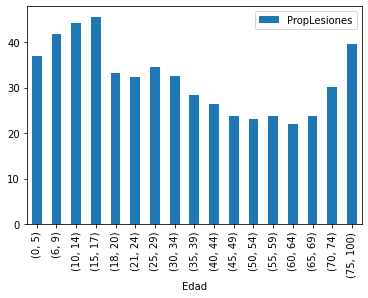

: 

: 

In [ ]:
# Esta celda debe ser completada por el estudiante


## f) Un cálculo masivo con map-reduce [0.5 puntos]

En este apartado se ha de realizar un programa aparte que calcule, para cada rango de edad, un par de enteros con los totales de podría activarse así desde la consola:

    C:\...> python total_accs_edad.py -q 2020_Accidentalidad.csv

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [ ]:
# Hagamos una llamada al programa de consola desde aquí:

! python total_accs_edad.py -q 2020_Accidentalidad.csv

: 

: 

In [ ]:
# Para que el resultado se almacene en un archivo:

! python total_accs_edad.py -q 2020_Accidentalidad.csv  > accidentalidad_y_mortalidad_por_edades.txt

: 

: 

Para que pueda yo ver tu programa cómodamente desde aquí, también se puede mostrar con un comando de la consola, anteponiendo el símbolo `!`. Observaciones:

- La instrucción siguiente está comentada para ocultar una solución mía.
  Tú debes suprimir el símbolo `#` del comentario
  para mostrar tu solución aquí.
- Desde mac o linux, se ha de usar el comando `cat`, en vez de `type`.

In [ ]:
! type total_accs_edad.py

: 

: 

## g) Un apartado libre [0.5 puntos]

Dejo este apartado a tu voluntad. Inventa tú mismo el enunciado y resuélvelo, mostrando algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anteriores, relacionado con el análisis de datos y con este proyecto. He aquí dos ejemplos posibles:

- Me he quedado un poco insatisfecho con el uso de pandas, un poco escaso: este apartado adicional podría usar dicha librería poniendo en juego algunas operaciones que no hemos visto.

- Tampoco me gusta mucho el acabado de las figuras:
  la librería Plotly puede ser quizá permitirte trazar figuras más
  profesionales, y una posibilidad sencilla es quizá
  importar los datos del archivo creado por el programa de map-reduce
  y representarlos gráficamente.
  
Estos ejemplos pueden servirte como pista, pero que no te limiten. Hay muchas otras posibilidades: geopandas, web scraping, etc.

En la evaluación, si este apartado está bien o muy bien, anota un 0.4. El 0,5 lo reservaremos para las situaciones en que se presente algo brillante, con alguna idea original o alguna técnica novedosa o complejidad especial o algún gráfico vistoso. Especialmente quien opta a un 9,5 o más, debe esmerarse en plantear este apartado a la altura de esa calificación.

In [ ]:
# Este apartado debe ser completado por el estudiante



: 

: 

In [ ]:
# Pruebas de funcionamiento:



: 

: 

### Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** ......................................
-   **Nombre:** ......................................
-   **Email:** ......................................
-   **Fecha:** ......................................

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">

<font color="green">
**Comentarios sobre la autoevaluación**: 

Aquí vienen comentarios del estudiante. Lo siguiente es un ejemplo posible obviamente ... elimina este párrafo y redacta el tuyo propio, en azul.

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.0  |Completamente resuelto |
|b)  |0.0  / 2.0  |No lo he conseguido |
|c)  |0.25 / 2.0  |Sólo he conseguido una parte mínima |
|d)  |0.25 / 1.5  |Sólo he conseguido una parte mínima |
|e)  |0.0  / 1.5  |No lo he conseguido |
|f)  |0.5  / 0.5  |No lo he conseguido |
|g)  |0.0  / 0.5  |No he logrado el correcto funcionamiento |
|**Total** |**2.5** / 10.0|**Suspenso**|

</font>

<font color="black">
    
### Ayuda recibida y fuentes utilizadas

<br>
    
<font color="green">
... comentarios del estudiante ...
Pon tú este párrafo con tus propias observaciones. Elimina este párrafo en verde.
</font>

<br>

<font color="black">
    
### Comentario adicional

<br>

<font color="green">
... Este apartado es optativo. Si lo completas, ponlo en azul; si no, suprímelo con su título.

<br>

In [ ]:
# Esta celda se ha de respetar: está aquí para comprobar el funcionamiento de algunas funciones por parte de tu profesor

: 

: 